In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [57]:
import pandas as pd

df = pd.read_csv('/content/household_power_consumption.txt',
                 sep=';',
                 header=0)


/tmp/ipython-input-4247139237.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/household_power_consumption.txt',


In [58]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [60]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [61]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [62]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [63]:
cols = df[['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']]
for col in cols:
   df[col] = df[col].replace('?', 0)


In [64]:
for col in cols:
    df[col] = df[col].astype('float64')


In [65]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


In [67]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,25979


In [69]:
df.shape

(2075259, 9)

In [73]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

X_col = df[['Sub_metering_3']]

df['Sub_metering_3'] = imputer.fit_transform(X_col)


In [74]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


<Axes: >

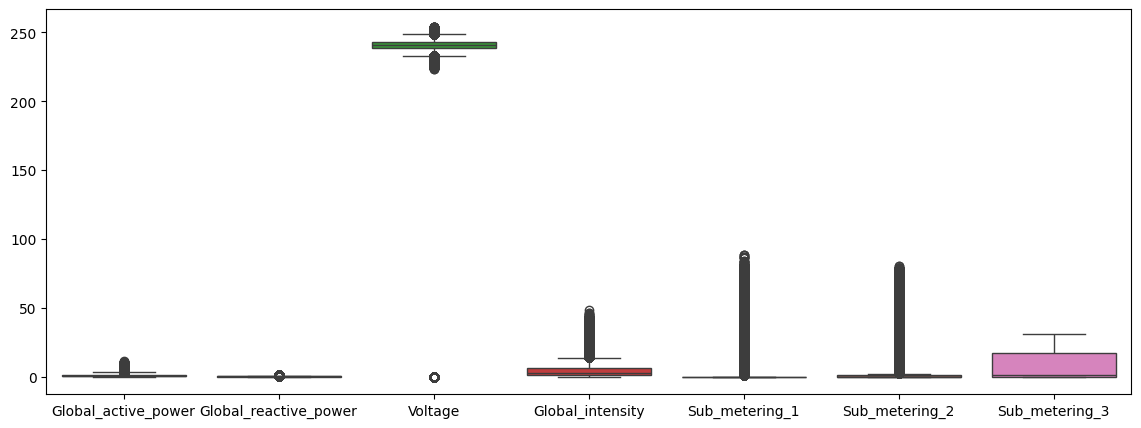

In [77]:
import seaborn as sns
plt.figure(figsize = (14,5))
sns.boxplot(df)

In [ ]:
# Hence there are many outliers so we should handle it

In [80]:
X = df[['Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3']]


In [88]:

df['Time_parsed'] = pd.to_datetime(df['Time'], format='%H:%M:%S')
df['Hour'] = df['Time_parsed'].dt.hour
df = df.drop(columns=['Time_parsed'])


In [89]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour
0,16/12/2006,17:24:00,3.344,0.411,234.84,13.9,0.0,1.0,17.0,17
1,16/12/2006,17:25:00,3.344,0.411,233.63,13.9,0.0,1.0,16.0,17
2,16/12/2006,17:26:00,3.344,0.411,233.29,13.9,0.0,2.0,17.0,17
3,16/12/2006,17:27:00,3.344,0.411,233.74,13.9,0.0,1.0,17.0,17
4,16/12/2006,17:28:00,3.344,0.411,235.68,13.9,0.0,1.0,17.0,17
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,21


In [90]:
df['Energy_Consumed'] = df['Global_active_power'] * df['Hour']

In [91]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour,Energy_Consumed
0,16/12/2006,17:24:00,3.344,0.411,234.84,13.9,0.0,1.0,17.0,17,56.848
1,16/12/2006,17:25:00,3.344,0.411,233.63,13.9,0.0,1.0,16.0,17,56.848
2,16/12/2006,17:26:00,3.344,0.411,233.29,13.9,0.0,2.0,17.0,17,56.848
3,16/12/2006,17:27:00,3.344,0.411,233.74,13.9,0.0,1.0,17.0,17,56.848
4,16/12/2006,17:28:00,3.344,0.411,235.68,13.9,0.0,1.0,17.0,17,56.848
...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,20,18.920
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,20,18.880
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,21,19.698
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,21,19.614


In [81]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

for col in X:
    df[col] = df[col].clip(lower = lower[col],upper = upper[col])

<Axes: >

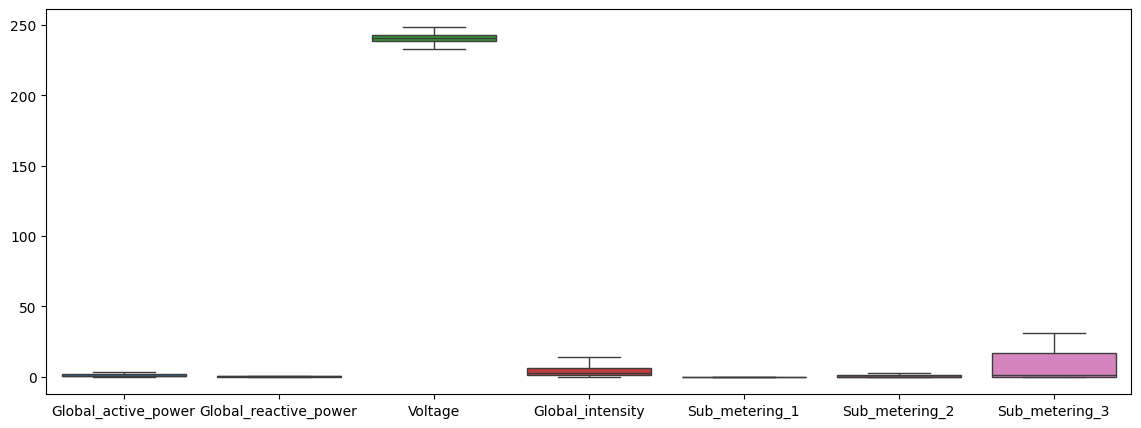

In [82]:
plt.figure(figsize = (14,5))
sns.boxplot(df)

In [ ]:
# Now lets do RFE

In [95]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Hour', 'Energy_Consumed'],
      dtype='object')

In [102]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Suppose df is your DataFrame
x = df.drop(columns=['Energy_Consumed','Date','Time'])
y = df['Energy_Consumed']

# Standardize
std = StandardScaler()
X_std = std.fit_transform(x)

# Polynomial features
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_std)

# Convert back to pandas DataFrame so we keep column names
feature_names = poly.get_feature_names_out(input_features = x.columns)
X_poly_df = pd.DataFrame(X_poly, columns = feature_names, index = x.index)

# Split into train & test
x_train, x_test, y_train, y_test = train_test_split(
    X_poly_df, y, test_size=0.2, random_state=42
)

# Estimator + RFE
estimator = LinearRegression()
selector = RFE(estimator=estimator, n_features_to_select=5, step=1)
selector.fit(x_train, y_train)

# Get selected feature names
selected_features = x_train.columns[selector.support_]
print('Selected Features:', selected_features)

# Transform to selected features
x_train_sel = selector.transform(x_train)
x_test_sel = selector.transform(x_test)

# Fit & predict
estimator.fit(x_train_sel, y_train)
y_pred = estimator.predict(x_test_sel)

# Evaluate
print("R² on test set:", r2_score(y_test, y_pred))
print("MSE on test set:", mean_squared_error(y_test, y_pred))
print("Feature ranking (1 = selected):", selector.ranking_)


Selected Features: Index(['Global_active_power', 'Hour', 'Global_active_power Global_intensity',
       'Global_active_power Hour', 'Global_intensity^2'],
      dtype='object')
R² on test set: 1.0
MSE on test set: 3.37265971021123e-28
Feature ranking (1 = selected): [36  1 35 32 34  8 12 11  1  3 10 22  1 15 30  6  1 17 13 18 28 21 29 20
 24 14 26 31 19 23  1 33 16  2  7 37 39 38 41 25  4 40  5  9 27]


In [103]:
df['Global_active_power Global_intensity'] = df['Global_active_power'] * df['Global_intensity']
df['Global_intensity^2'] = df['Global_intensity'] * df['Global_intensity']

In [104]:
x_ = df[['Global_active_power', 'Hour', 'Global_active_power Global_intensity',
       'Global_intensity^2']]
y = df['Energy_Consumed']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [114]:
std = StandardScaler()
X_std = std.fit_transform(x_)

poly = PolynomialFeatures()
X_poly = poly.fit_transform(X_std)

x_train,x_test,y_train,y_test = train_test_split(X_poly,y,test_size = 0.2,random_state = 42)

model = LinearRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)


print("MSE on test set:", mean_squared_error(y_test, y_pred))
print('MAE on test set:',mean_absolute_error(y_test,y_pred))
print("R² on test set:", r2_score(y_test, y_pred))


MSE on test set: 1.1076716358336282e-26
MAE on test set: 1.0338146714768409e-13
R² on test set: 1.0


In [117]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()

param = {
    'alpha' : [0.01,1,10],
    'max_iter' : [100,200]
}

grid = GridSearchCV(lasso,param,cv = 5,scoring = 'r2')
grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("MSE on test set:", mean_squared_error(y_test, y_pred))
print('MAE on test set:',mean_absolute_error(y_test,y_pred))
print("R² on test set:", r2_score(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.455e+04, tolerance: 3.548e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.779e+04, tolerance: 3.542e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.587e+04, tolerance: 3.546e

MSE on test set: 0.00029347266370780743
MAE on test set: 0.01319826823901858
R² on test set: 0.9999989030888433


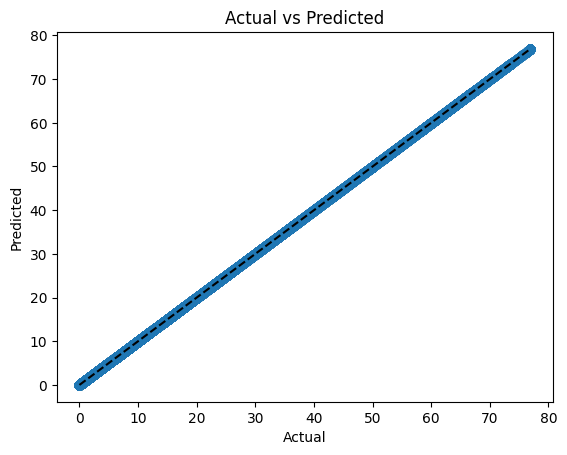

In [118]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


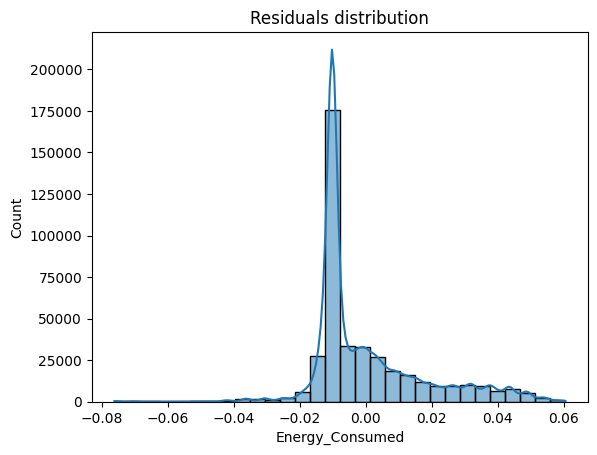

In [119]:
residuals = y_test - y_pred
sns.histplot(residuals, bins=30,kde = True)
plt.title('Residuals distribution')
plt.show()


In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator, selector.transform(X_poly_df), y, cv=5, scoring='r2')
print('CV R²:', scores, scores.mean())


CV R²: [1. 1. 1. 1. 1.] 1.0
